In [1]:
import numpy as np
import pandas as pd

from util import ds
import os

import matplotlib.pyplot as plt
from collections import Counter

In [2]:
images_path = 'fall-detection.dataset/train/images'
labels_path = 'fall-detection.dataset/train/labels'

images, labels = ds.load_dataset(images_path, labels_path)

Total images loaded: 1263
Total labels loaded: 1263


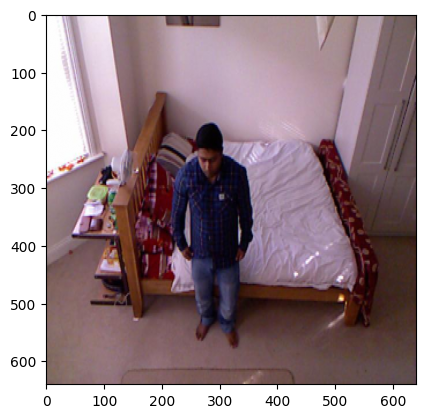

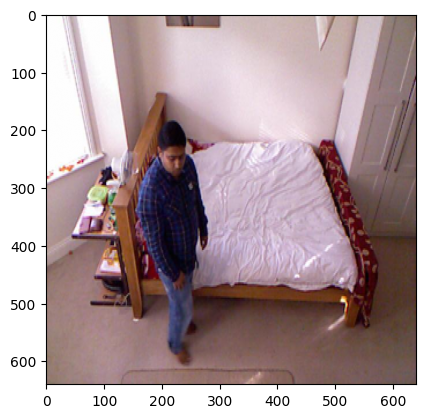

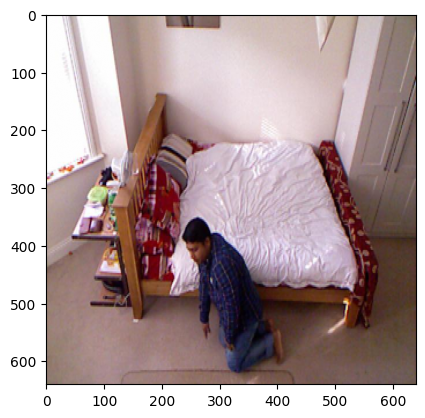

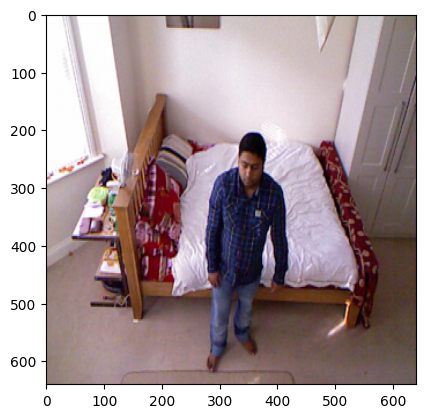

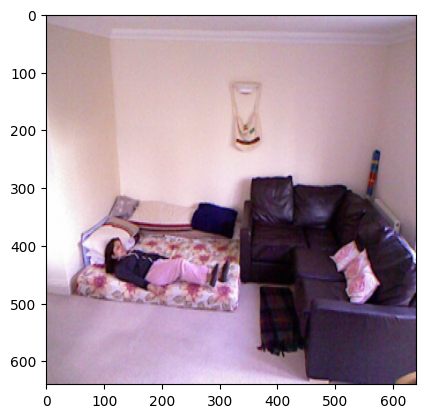

In [3]:
for i in range(5):
    plt.imshow(images[100*i])
    plt.show()

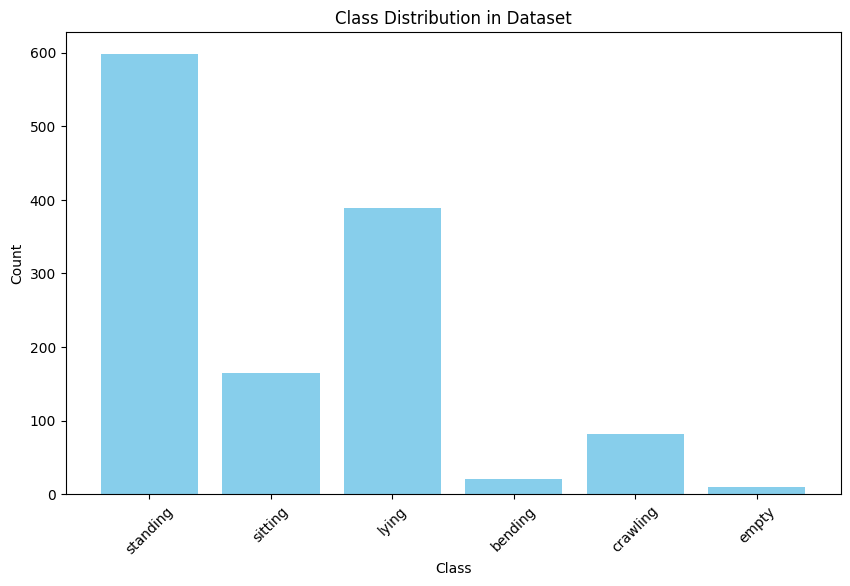

In [4]:
#label = [lbl for _, lbl in labels if lbl is not None]
label_counts = Counter(labels)

classes = list(label_counts.keys())
counts = list(label_counts.values())

class_mapping = {
    0: 'bending',
    1: 'crawling',
    2: 'lying',
    3: 'sitting',
    4: 'standing',
    5: 'empty'
}

mapped_label_counts = {class_mapping[key]: value for key, value in label_counts.items()}

classes = list(mapped_label_counts.keys())
counts = list(mapped_label_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

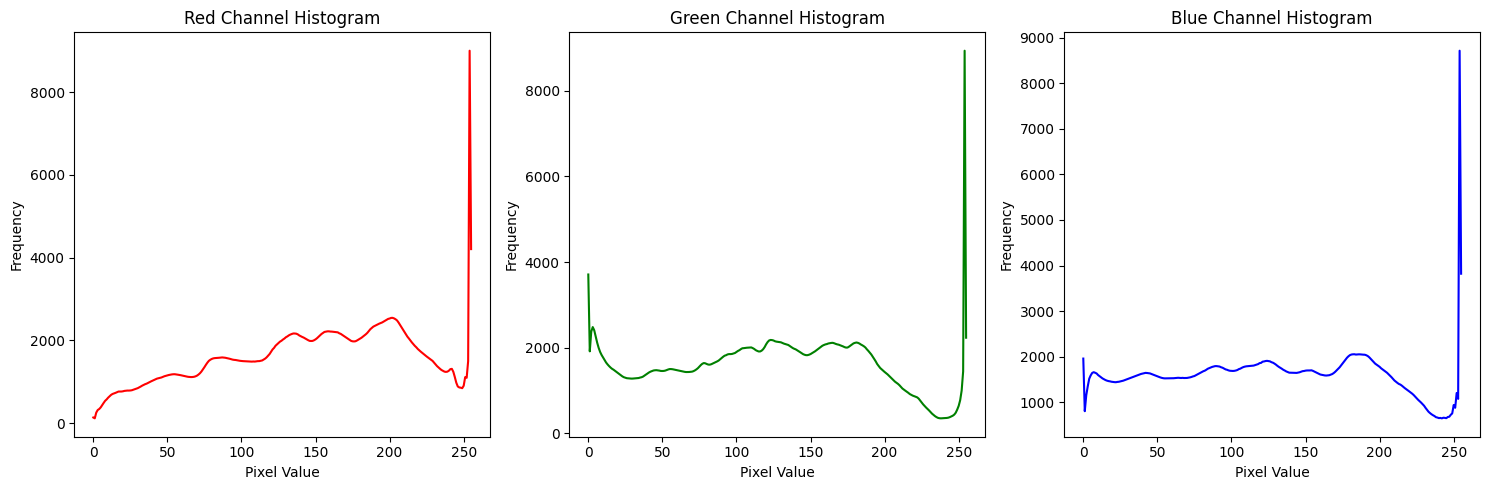

In [5]:
color_distributions = []

for img in images:
    if img is not None:
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)
        
        r_channel = img[:, :, 0].flatten().astype(np.int64)
        g_channel = img[:, :, 1].flatten().astype(np.int64)
        b_channel = img[:, :, 2].flatten().astype(np.int64)
        
        r_hist = np.bincount(r_channel, minlength=256)
        g_hist = np.bincount(g_channel, minlength=256)
        b_hist = np.bincount(b_channel, minlength=256)
        
        color_distributions.append((r_hist, g_hist, b_hist))

mean_r_hist = np.mean([dist[0] for dist in color_distributions], axis=0)
mean_g_hist = np.mean([dist[1] for dist in color_distributions], axis=0)
mean_b_hist = np.mean([dist[2] for dist in color_distributions], axis=0)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(mean_r_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(mean_g_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(mean_b_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

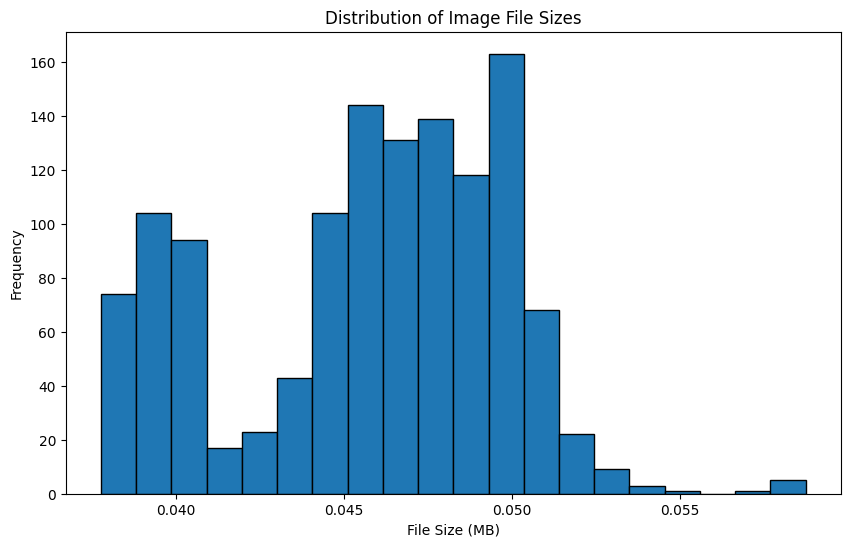

In [6]:
root_path = "fall-detection.dataset/train/images"

sizes = []

for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        file_size = os.path.getsize(file_path)
        sizes.append(file_size / 1_000_000)
        
plt.figure(figsize=(10, 6))
plt.hist(sizes, bins=20, edgecolor='black')
plt.title('Distribution of Image File Sizes')
plt.xlabel('File Size (MB)')
plt.ylabel('Frequency')
plt.show()